<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import panel as pn
import plotly.graph_objects as go
import plotly.express as px

from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

pn.extension('plotly')

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

### Solución

**Nota: Se usarán las bases correspondientes a los primeros semestres (2019-2021) debido a las restricciones en el tamaño de los archivos.**

In [2]:
datos_20211 = pd.read_csv("Archivos/SB11_20211.txt", sep = "¬")
datos_20201 = pd.read_csv("Archivos/SB11_20201.txt", sep = "¬")
datos_20191 = pd.read_csv("Archivos/SB11_20191.txt", sep = "¬")
datos_20181 = pd.read_csv("Archivos/SB11_20181.txt", sep = "¬")

# Unimos los datos de los diferentes periodos en un solo dataframe.
datos_base = datos_20211.append(datos_20201, ignore_index = True)
datos_base = datos_base.append(datos_20191, ignore_index = True)
datos_base = datos_base.append(datos_20181, ignore_index = True)

C:\Users\caman\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
print("Filas: {}, Columnas: {}".format(datos_base.shape[0], datos_base.shape[1]))

Filas: 64573, Columnas: 84


Vemos que el número de columnas que trae el archivo base es bastante alto. Por lo tanto, procedemos a realizar una preselección de variables que podrían llegar a ser interesantes para el análisis. Idealmente, incluir variables tanto categóricas como numéricas.

Teniendo en cuenta el diccionario de variables (https://www.icfes.gov.co/documents/20143/1885630/6.+Diccionario+Saber11+2019-1+a+2019-2.pdf) y el enfoque socio-demográfico del análisis a realizar, definimos las variables de interés a usar según nuestro criterio.

In [4]:
columnas_interes = [
    # Variables Categóricas
    "ESTU_GENERO",
    "ESTU_TIENEETNIA",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_PERSONASHOGAR",
    "FAMI_CUARTOSHOGAR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_NUMLIBROS",
    "FAMI_COMECARNEPESCADOHUEVO",
    "FAMI_SITUACIONECONOMICA",
    "COLE_CALENDARIO",
    "COLE_BILINGUE",
    "COLE_CARACTER",
    "COLE_AREA_UBICACION",
    # Variables numéricas
    # Percentiles
    "PERCENTIL_LECTURA_CRITICA",
    "PERCENTIL_MATEMATICAS",
    "PERCENTIL_C_NATURALES",
    "PERCENTIL_SOCIALES_CIUDADANAS",
    "PERCENTIL_INGLES",
    # Puntajes
    "PUNT_LECTURA_CRITICA",
    "PUNT_MATEMATICAS",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "PUNT_GLOBAL"
]

print("Se seleccionarion {} variables.".format(len(columnas_interes)))

Se seleccionarion 26 variables.


In [5]:
# De la preselección, retorne la lista de variables categóricas
variables_categoricas = [
    "ESTU_GENERO",
    "ESTU_TIENEETNIA",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_PERSONASHOGAR",
    "FAMI_CUARTOSHOGAR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_NUMLIBROS",
    "FAMI_COMECARNEPESCADOHUEVO",
    "FAMI_SITUACIONECONOMICA",
    "COLE_CALENDARIO",
    "COLE_BILINGUE",
    "COLE_CARACTER",
    "COLE_AREA_UBICACION"
]

# De la preselección, retorne la lista de variables continuas
variables_puntaje = [
    "PUNT_LECTURA_CRITICA",
    "PUNT_MATEMATICAS",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "PUNT_GLOBAL"
]

variables_percentiles = [
    "PERCENTIL_LECTURA_CRITICA",
    "PERCENTIL_MATEMATICAS",
    "PERCENTIL_C_NATURALES",
    "PERCENTIL_SOCIALES_CIUDADANAS",
    "PERCENTIL_INGLES"
]

Se considera que 26 variables es un buen número para poder realizar un análisis descriptivo de la situación sin perder poder explicativo como analista, En especial porque 11 de las variables corresponden a variables de resuesta del examen, tanto puntajes como percentiles, los cuales van a ser muy útiles a la hora de definir el riesgo como objetivo. De las variables seleccionadas, se ha hecho un mayor énfasis en las variables que describen la situación familiar del estudiante.

La gran mayoría de las variables de la base son variables categóricas, donde las variables númericas son principalmente las variables de resultado. El puntaje global es el resultado de una combinación lineal exacta entre las demás variables de puntaje, sin embargo sigue siendo una variable importante a la hora de entender los datos dados.

In [6]:
datos_analisis = datos_base[columnas_interes]
datos_analisis.tail()

,ESTU_GENERO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENEAUTOMOVIL,FAMI_NUMLIBROS,FAMI_COMECARNEPESCADOHUEVO,...,PERCENTIL_MATEMATICAS,PERCENTIL_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,PERCENTIL_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
64568,M,No,Estrato 3,5 a 6,Cinco,Si,Si,Si,11 A 25 LIBROS,Todos o casi todos los días,...,10,24,15,33.0,39,37,46,41,51.0,208
64569,F,Si,Estrato 3,3 a 4,Dos,Si,Si,No,11 A 25 LIBROS,Todos o casi todos los días,...,51,41,22,25.0,54,58,54,44,46.0,260
64570,M,No,NaN,3 a 4,Cinco,NaN,Si,Si,NaN,NaN,...,47,3,6,1.0,51,56,32,34,26.0,210
64571,M,No,Estrato 3,1 a 2,Dos,Si,Si,Si,11 A 25 LIBROS,3 a 5 veces por semana,...,7,16,27,21.0,50,34,41,47,44.0,215
64572,M,No,Estrato 3,3 a 4,Dos,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,...,45,51,51,18.0,57,55,58,57,42.0,278


Según la previa anterior, es posible que estemos ante una presencia significativa de datos faltantes.

In [7]:
# Hallamos el porcentaje de datos faltantes con respecto al total para cada variable.
filas = datos_analisis.shape[0]
# Porcentaje de datos faltantes por columna.
datos_analisis.isnull().sum() / filas * 100

ESTU_GENERO                       0.009292
ESTU_TIENEETNIA                   3.829774
FAMI_ESTRATOVIVIENDA              6.502718
FAMI_PERSONASHOGAR                4.692364
FAMI_CUARTOSHOGAR                 4.726434
FAMI_TIENEINTERNET                6.199185
FAMI_TIENECOMPUTADOR              4.608737
FAMI_TIENEAUTOMOVIL               4.822449
FAMI_NUMLIBROS                    7.537206
FAMI_COMECARNEPESCADOHUEVO        6.350952
FAMI_SITUACIONECONOMICA           4.806963
COLE_CALENDARIO                   0.000000
COLE_BILINGUE                    16.551810
COLE_CARACTER                     5.259164
COLE_AREA_UBICACION               0.000000
PERCENTIL_LECTURA_CRITICA         0.000000
PERCENTIL_MATEMATICAS             0.000000
PERCENTIL_C_NATURALES             0.000000
PERCENTIL_SOCIALES_CIUDADANAS     0.000000
PERCENTIL_INGLES                  0.072786
PUNT_LECTURA_CRITICA              0.000000
PUNT_MATEMATICAS                  0.000000
PUNT_C_NATURALES                  0.000000
PUNT_SOCIAL

Vemos que COLE_BILINGUE tiene una tasa de faltantes bastante alta. A pesar de esto, se especula que podría llegar a ser significativa.

In [8]:
datos_analisis = datos_analisis.dropna()
eliminados = filas - datos_analisis.shape[0]
print("Se han eliminado {} datos, correspondientes al {}%. {} datos restantes."
      .format(eliminados, eliminados/filas * 100, datos_analisis.shape[0]))

Se han eliminado 17676 datos, correspondientes al 27.373670109798216%. 46897 datos restantes.


Se eliminan los datos donde al menos una de las variables seleccionadas no está presente. A pesar de que esto puede llegar a impactar significativamente el resultado del análisis, se considera que el número de datos restantes sigue siendo suficiente para concluir, teniendo en cuenta el nivel de complejidad que puede llegar a tener una imputación sobre variables categóricas.

Descripción de las variables numéricas.

In [9]:
# Descripción de las variables numéricas. En este caso, los puntajes.
# No tiene sentido sacar estadísticos básicos sobre los percentiles.
datos_analisis.drop(variables_percentiles, axis = 1).describe()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,46897.000000,46897.000000,46897.000000,46897.000000,46897.000000,46897.000000
mean,61.981108,61.816918,59.476470,58.943664,68.009915,305.639295
std,10.836150,13.248472,11.912633,13.157001,16.464361,57.694543
min,21.000000,0.000000,21.000000,18.000000,0.000000,123.000000
25%,55.000000,53.000000,52.000000,50.000000,56.000000,267.000000
50%,63.000000,63.000000,61.000000,61.000000,71.000000,314.000000
75%,70.000000,71.000000,68.000000,69.000000,81.000000,350.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,495.000000


Descripción de las variables categóricas (Lista de los valores presentes)

In [10]:
# Lista de los valores presentes en las variables categóricas.
for columna in datos_analisis[variables_categoricas]:
    print("{}: {}".format(columna, sorted(datos_analisis[columna].unique())))

ESTU_GENERO: ['F', 'M']
ESTU_TIENEETNIA: ['No', 'Si']
FAMI_ESTRATOVIVIENDA: ['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6', 'Sin Estrato']
FAMI_PERSONASHOGAR: ['1 a 2', '3 a 4', '5 a 6', '7 a 8', '9 o más']
FAMI_CUARTOSHOGAR: ['Cinco', 'Cuatro', 'Dos', 'Seis o mas', 'Tres', 'Uno']
FAMI_TIENEINTERNET: ['No', 'Si']
FAMI_TIENECOMPUTADOR: ['No', 'Si']
FAMI_TIENEAUTOMOVIL: ['No', 'Si']
FAMI_NUMLIBROS: ['0 A 10 LIBROS', '11 A 25 LIBROS', '26 A 100 LIBROS', 'MÁS DE 100 LIBROS']
FAMI_COMECARNEPESCADOHUEVO: ['1 o 2 veces por semana', '3 a 5 veces por semana', 'Nunca o rara vez comemos eso', 'Todos o casi todos los días']
FAMI_SITUACIONECONOMICA: ['Igual', 'Mejor', 'Peor']
COLE_CALENDARIO: ['A', 'B', 'OTRO']
COLE_BILINGUE: ['N', 'S']
COLE_CARACTER: ['ACADÉMICO', 'NO APLICA', 'TÉCNICO', 'TÉCNICO/ACADÉMICO']
COLE_AREA_UBICACION: ['RURAL', 'URBANO']


# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

### Solución

Usando el dataframe obtenido anteriormente, lo primero que podríamos hacer es generar una matriz de correlación entre las variables numéricas, visualizada como un mapa de calor.

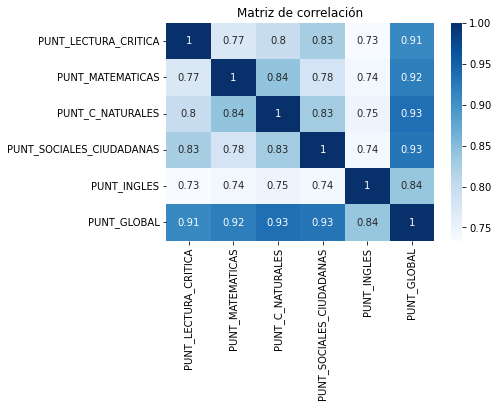

In [11]:
datos_puntaje = datos_analisis.drop(variables_percentiles, axis = 1)
sns.heatmap(datos_puntaje.corr(), cmap = "Blues", annot=True)
plt.title('Matriz de correlación');

Como era de esperarse, existe una alta correlación entre las variables de resultado. El puntaje global corresponde a una combinación lineal de las demás. Esto es muy importante a tener en cuenta cuando se vaya a definir el modelo. Si realizamos un gráfico de pares, dicha correlación se puede evidenciar gráficamente.

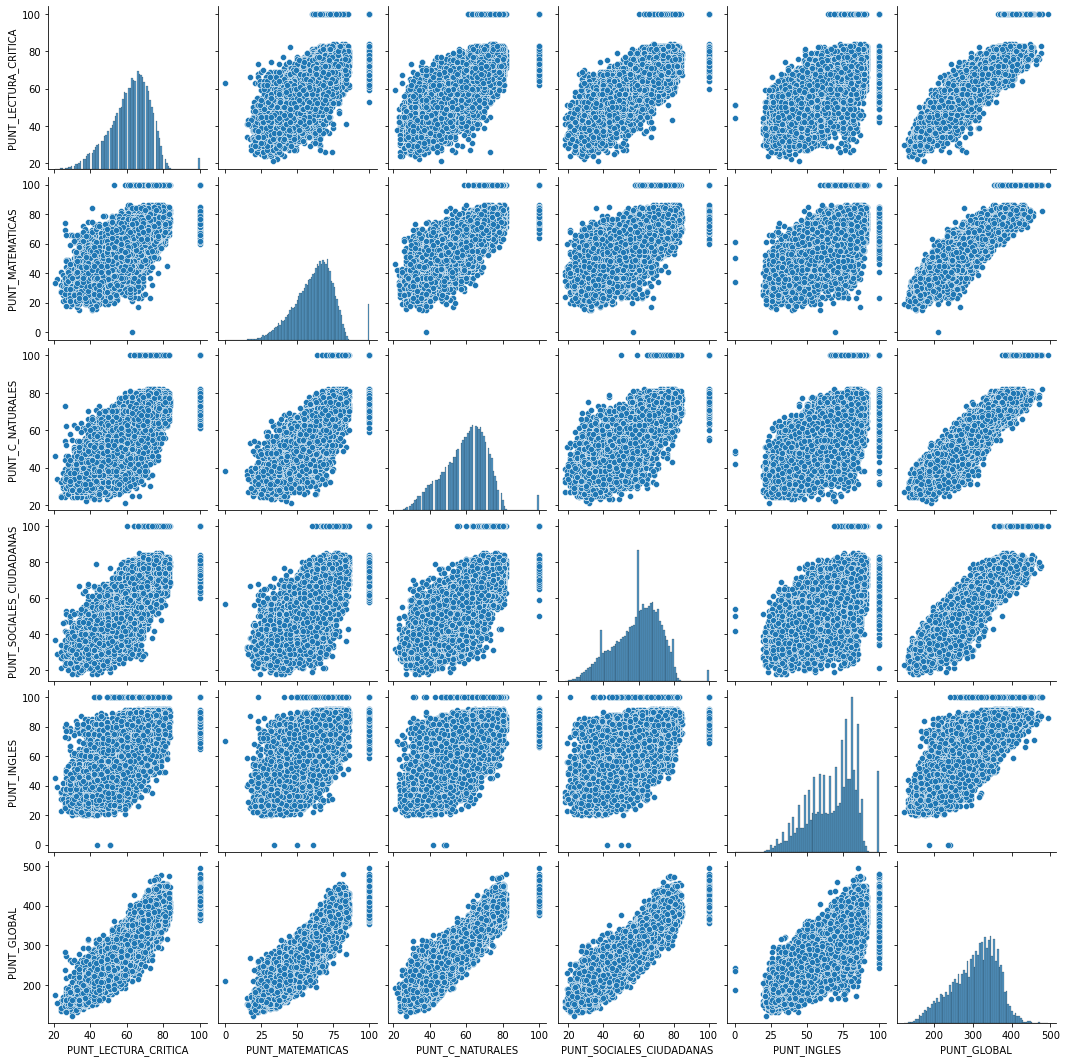

In [12]:
sns.pairplot(datos_puntaje)

Con lo anterior ratificamos que en efecto, los puntajes están linealmente correlacionados con el puntaje global. Sin embargo, es interesante ver que los demás puntajes no estan correlacionados entre si. Adicionalmente, vemos que hay muchos valores extremos. Si bien es interesante ver bajo qué condiciones un estudiante obtiene un puntaje perfecto (o 0), con estos datos se dificulta la tarea de identificar estudiantes en riesgo.

Ahora procedemos a ver cómo las diferentes variables categóricas interactúan con los puntajes de la prueba. Para este ejercicio nos limitamos a realizar una evaluación gráfica entre los diferentes grupos.

Antes de revisar los diferentes grupos, valdría la pena realizar un distplot sobre el puntaje global, para ver si el supuesto de normalidad se cumple sobre los diferentes test que puedan surgir.

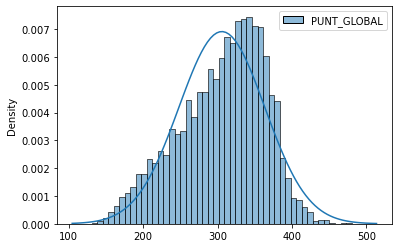

In [13]:
x = datos_analisis[['PUNT_GLOBAL']]
ax = sns.histplot(x, bins=50, stat='density')
mu, std = stats.norm.fit(x)
xx = np.linspace(*ax.get_xlim(),100)
ax.plot(xx, stats.norm.pdf(xx, mu, std));

Vemos que los datos corresponden a una distribución normal cesgada, lo cual puede ser un inconveniente a la hora de definir el riesgo. Es por esta razón, que se usarán los percentiles dados en la página oficial.

In [14]:
variables_preseleccion = []

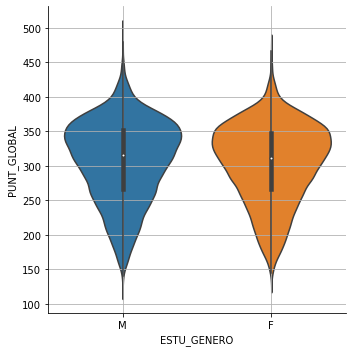

In [15]:
# Género
sns.catplot(x = "ESTU_GENERO", y = "PUNT_GLOBAL", data = datos_analisis, kind = "violin")
plt.grid()

Vemos que el género no influye significativamente en el puntaje global.

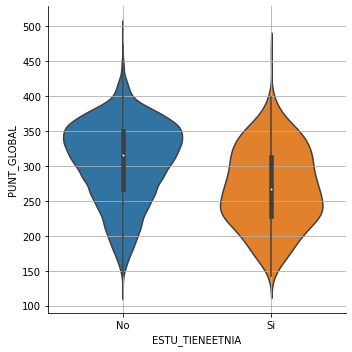

In [16]:
# Tiene Etnia
sns.catplot(x = "ESTU_TIENEETNIA", y = "PUNT_GLOBAL", data = datos_analisis,
            order = ["No", "Si"], kind = "violin")
plt.grid()

variables_preseleccion.append("ESTU_TIENEETNIA")

Si el estudiante pertenece o no a una etnia minoritaria influye significativamente en el puntaje global. Las etnias minoritarias tienen un desempeño menor.

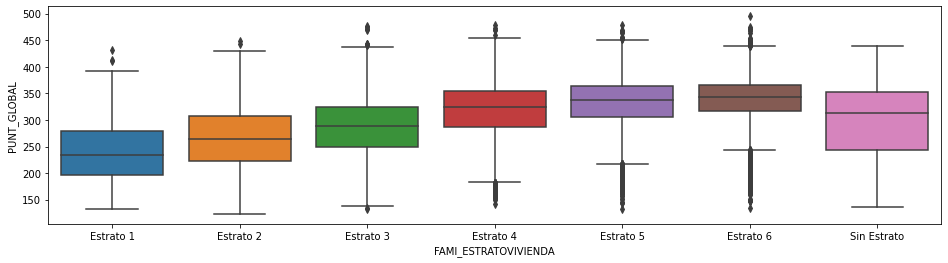

In [17]:
# Estrato
plt.figure(figsize=(16,4)) # Solo es tenido en cuenta para boxplot.
sns.boxplot(x = "FAMI_ESTRATOVIVIENDA", y = "PUNT_GLOBAL", data = datos_analisis,
            order = sorted(datos_analisis["FAMI_ESTRATOVIVIENDA"].unique()))

variables_preseleccion.append("FAMI_ESTRATOVIVIENDA")

El estrato tiene un impacto significativo en el puntaje global, donde el puntaje es directamente proporcional al estrato. También se observa que la categoría "Sin Estrato" tiene una variación bastante alta para los periodos seleccionados.

<AxesSubplot:xlabel='FAMI_PERSONASHOGAR', ylabel='PUNT_GLOBAL'>

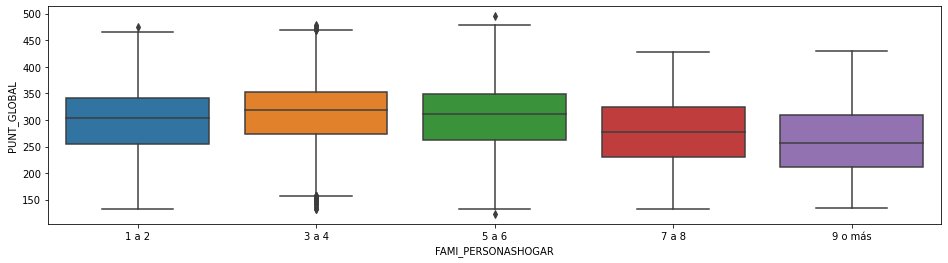

In [18]:
# FAMI_PERSONASHOGAR
plt.figure(figsize=(16,4)) # Solo es tenido en cuenta para boxplot.
sns.boxplot(x = "FAMI_PERSONASHOGAR", y = "PUNT_GLOBAL", data = datos_analisis,
            order = sorted(datos_analisis["FAMI_PERSONASHOGAR"].unique()))

Curiosamente, observamos que el número de personas en el hogar puede llegar a ser significativo en el resultado. Estudiantes en hogares con 7 personas o más tienen un desempeño menor. Valdría la pena reclasificar en 2 grupos y evaluar esta nueva variable.

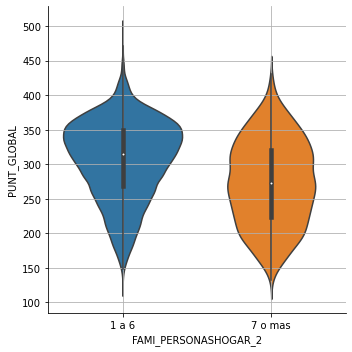

In [19]:
def reclasificacion_personas_hogar(row):
    if row["FAMI_PERSONASHOGAR"] in ["1 a 2", "3 a 4", "5 a 6"]:
        return "1 a 6"
    else:
        return "7 o mas"
    
datos_analisis["FAMI_PERSONASHOGAR_2"] = datos_analisis.apply(lambda x: reclasificacion_personas_hogar(x), axis = 1)

# FAMI_PERSONASHOGAR_2
sns.catplot(x = "FAMI_PERSONASHOGAR_2", y = "PUNT_GLOBAL", data = datos_analisis, kind = "violin")
plt.grid()

variables_preseleccion.append("FAMI_PERSONASHOGAR_2")

Esta nueva variable podría incluirse en el modelo. Se evidencia que las personas del grupo 2 tienen una varianza mucho mayor, sin embargo el impacto sigue siendo bastante claro.

<AxesSubplot:xlabel='FAMI_CUARTOSHOGAR', ylabel='PUNT_GLOBAL'>

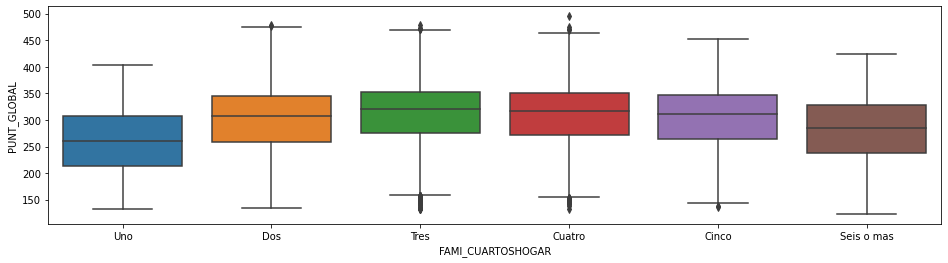

In [20]:
# FAMI_CUARTOSHOGAR
plt.figure(figsize=(16,4)) # Solo es tenido en cuenta para boxplot.
sns.boxplot(x = "FAMI_CUARTOSHOGAR", y = "PUNT_GLOBAL", data = datos_analisis,
            order = ["Uno", "Dos", "Tres", "Cuatro", "Cinco", "Seis o mas"])

Vemos que en condiciones extremas, es decir, un solo cuarto o 6 o más, los estudiantes tienen un menor desempeño. Dado que la mayoría de los grupos definidos realmenmte no presenta una diferencia notoria, es preferible prescindir de la variable.

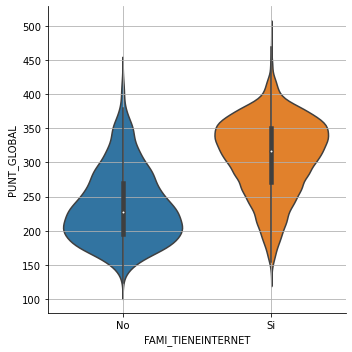

In [21]:
# FAMI_TIENEINTERNET
sns.catplot(x = "FAMI_TIENEINTERNET", y = "PUNT_GLOBAL", data = datos_analisis,
            order = ["No", "Si"], kind = "violin")
plt.grid()

Si el hogar tiene o no servicio de internet es un factor altamente significativo en el desempeño del estudiante.

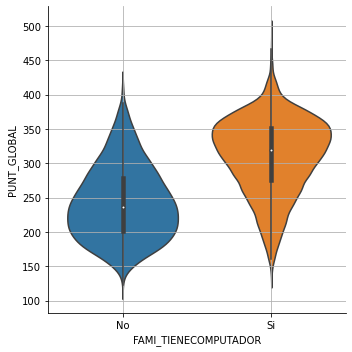

In [22]:
# FAMI_TIENECOMPUTADOR
sns.catplot(x = "FAMI_TIENECOMPUTADOR", y = "PUNT_GLOBAL", data = datos_analisis,
            order = ["No", "Si"], kind = "violin")
plt.grid()

variables_preseleccion.append("FAMI_TIENECOMPUTADOR")

De igual manera, el tener o no un computador en casa influye significativamente en el resultado. El comportamiento de FAMI_TIENECOMPUTADOR es tan similar a FAMI_TIENEINTERNET que se puede considerar simplemente dejar una de las dos variables, dado que se sospecha dependencia entre las dos. Para construir el modelo, podemos usar FAMI_TIENECOMPUTADOR.

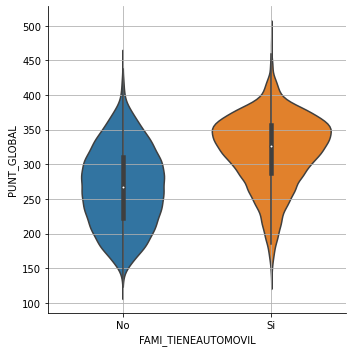

In [23]:
# FAMI_TIENEAUTOMOVIL
sns.catplot(x = "FAMI_TIENEAUTOMOVIL", y = "PUNT_GLOBAL", data = datos_analisis,
            order = ["No", "Si"], kind = "violin")
plt.grid()

variables_preseleccion.append("FAMI_TIENEAUTOMOVIL")

El tener automovil influye significativamente en el puntaje global.

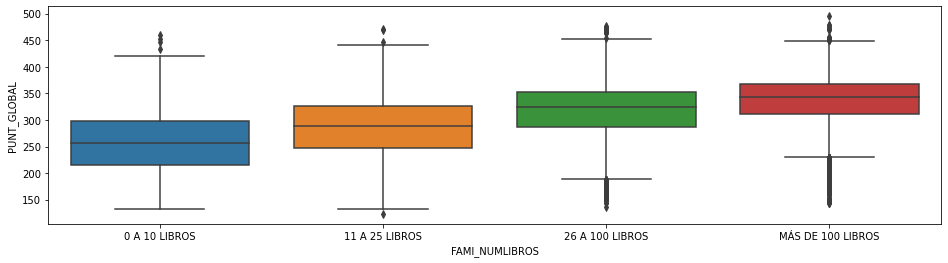

In [24]:
# FAMI_NUMLIBROS
plt.figure(figsize=(16,4)) # Solo es tenido en cuenta para boxplot.
sns.boxplot(x = "FAMI_NUMLIBROS", y = "PUNT_GLOBAL", data = datos_analisis,
            order = sorted(datos_analisis["FAMI_NUMLIBROS"].unique()))

variables_preseleccion.append("FAMI_NUMLIBROS")

<AxesSubplot:xlabel='FAMI_COMECARNEPESCADOHUEVO', ylabel='PUNT_GLOBAL'>

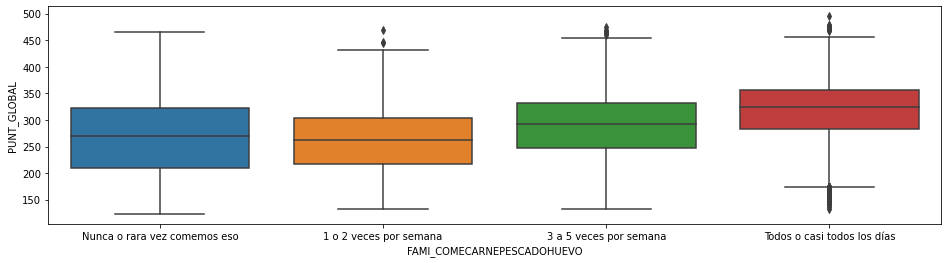

In [25]:
# FAMI_COMECARNEPESCADOHUEVO
plt.figure(figsize=(16,4)) # Solo es tenido en cuenta para boxplot.
sns.boxplot(x = "FAMI_COMECARNEPESCADOHUEVO", y = "PUNT_GLOBAL", data = datos_analisis,
            order = ["Nunca o rara vez comemos eso", "1 o 2 veces por semana",
                     "3 a 5 veces por semana", "Todos o casi todos los días"])

Se evidencia que puede haber una relación entre la alimentación de proteína y el puntaje global. Es posible reclasificar la variable, para visualizar 2 grupos en vez de 4. Para esto creamos una nueva variable.

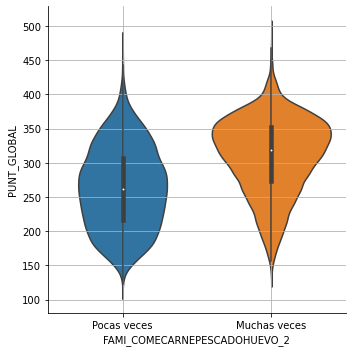

In [26]:
def reclasificacion_come_proteina(row):
    if row["FAMI_COMECARNEPESCADOHUEVO"] in ["Nunca o rara vez comemos eso", "1 o 2 veces por semana"]:
        return "Pocas veces"
    else:
        return "Muchas veces"
    
datos_analisis["FAMI_COMECARNEPESCADOHUEVO_2"] = datos_analisis.apply(lambda x: reclasificacion_come_proteina(x), axis = 1)

# FAMI_COMECARNEPESCADOHUEVO_2
sns.catplot(x = "FAMI_COMECARNEPESCADOHUEVO_2", y = "PUNT_GLOBAL", data = datos_analisis,
            order = ["Pocas veces", "Muchas veces"], kind = "violin")
plt.grid()

variables_preseleccion.append("FAMI_COMECARNEPESCADOHUEVO_2")

En efecto, esta nueva variable puede ser significativa para explicar el puntaje global.

<AxesSubplot:xlabel='FAMI_SITUACIONECONOMICA', ylabel='PUNT_GLOBAL'>

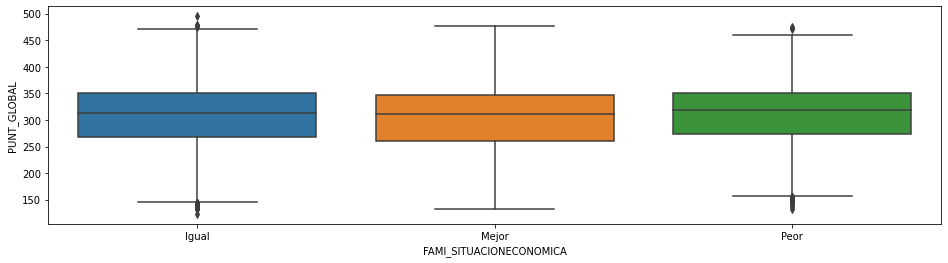

In [27]:
# FAMI_NUMLIBROS
plt.figure(figsize=(16,4)) # Solo es tenido en cuenta para boxplot.
sns.boxplot(x = "FAMI_SITUACIONECONOMICA", y = "PUNT_GLOBAL", data = datos_analisis,
            order = sorted(datos_analisis["FAMI_SITUACIONECONOMICA"].unique()))

La variable de situación económica del hogar no influye en el puntaje global del estudiante.

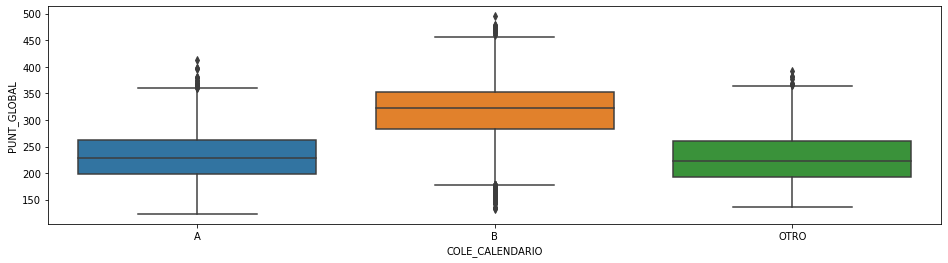

In [28]:
# COLE_CALENDARIO
plt.figure(figsize=(16,4)) # Solo es tenido en cuenta para boxplot.
sns.boxplot(x = "COLE_CALENDARIO", y = "PUNT_GLOBAL", data = datos_analisis,
            order = sorted(datos_analisis["COLE_CALENDARIO"].unique()))

variables_preseleccion.append("COLE_CALENDARIO")

Parece ser que el calendario en este caso influye en el resultado. También se revisó en datasets más robustos, tomando datos del segundo semestre y se validó que en efecto, la variable es significativa.

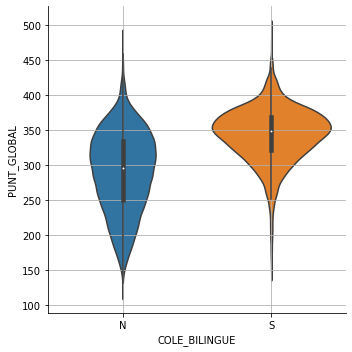

In [29]:
# COLE_BILINGUE
sns.catplot(x = "COLE_BILINGUE", y = "PUNT_GLOBAL", data = datos_analisis,
            order = ["N", "S"], kind = "violin")
plt.grid()

variables_preseleccion.append("COLE_BILINGUE")

Si el colegio es bilingüe influye significativamente en el puntaje global.

<AxesSubplot:xlabel='COLE_CARACTER', ylabel='PUNT_GLOBAL'>

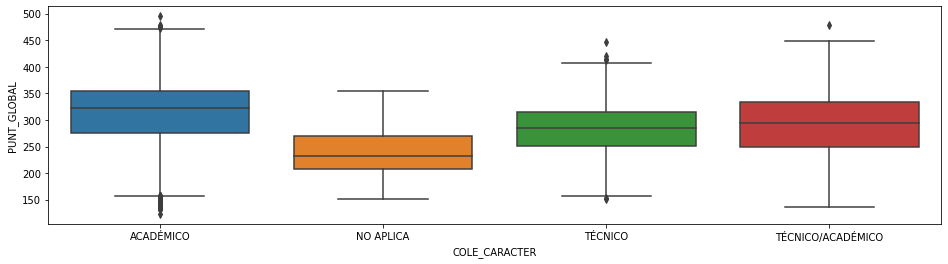

In [30]:
# COLE_CARACTER
plt.figure(figsize=(16,4)) # Solo es tenido en cuenta para boxplot.
sns.boxplot(x = "COLE_CARACTER", y = "PUNT_GLOBAL", data = datos_analisis,
            order = sorted(datos_analisis["COLE_CARACTER"].unique()))

Vemos que el grupo "No Aplica" difiere significativamente de los demás. Por otro lado si el colegio es o no académico parece influir en el resultado. Una opción podría ser reagrupar la variable para que solo tenga en cuenta si es académico o no, sin embargo, se concluye que esta variable puede ser omitida para el modelo.

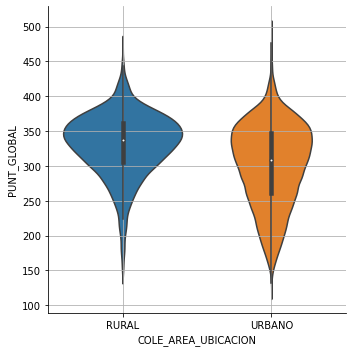

In [31]:
# COLE_AREA_UBICACION
sns.catplot(x = "COLE_AREA_UBICACION", y = "PUNT_GLOBAL", data = datos_analisis,
            order = sorted(datos_analisis["COLE_AREA_UBICACION"].unique()), kind = "violin")
plt.grid()

Por último, observamos que la ubicación del colegio es una variable bastante contra intuitiva. Se esperaría que los colegios urbanos tuvieran un mejor puntaje en general, sin embargo lo que se evidencia es que la variabilidad de la categoría es bastante alta. Adicionalmente, los estudiantes de un colegio rural tienen un mejor desempeño comparando la media. Para este caso lo mejor sería omitir la variable.

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

### Solución


A partir del análisis gráfico realizado en la misión anterior, estas son las variables que se han determinado como significativas para el modelo. Con las variables de percentil posteriormente se va a definir si el estudiante está o no en riesgo.

Se prefiere usar el percentil real obtenido en lo datos de la prueba sobre un percentil calculado, debido al procesamiento de los datos realizados previamente, además de ser la representación más acertada.

In [32]:
variables_modelo = []
variables_modelo.extend(variables_preseleccion)
variables_modelo.extend(variables_percentiles)

datos_modelo = datos_analisis[variables_modelo]
datos_modelo.head()

,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR_2,FAMI_TIENECOMPUTADOR,FAMI_TIENEAUTOMOVIL,FAMI_NUMLIBROS,FAMI_COMECARNEPESCADOHUEVO_2,COLE_CALENDARIO,COLE_BILINGUE,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,PERCENTIL_INGLES
0,No,Estrato 5,1 a 6,No,Si,0 A 10 LIBROS,Muchas veces,B,N,50,49,59,40,35.0
1,No,Estrato 3,1 a 6,Si,Si,11 A 25 LIBROS,Muchas veces,B,N,57,74,64,53,45.0
2,No,Estrato 3,1 a 6,Si,Si,0 A 10 LIBROS,Muchas veces,B,N,100,60,63,90,46.0
3,No,Estrato 4,1 a 6,Si,Si,26 A 100 LIBROS,Muchas veces,B,N,48,31,35,32,33.0
4,No,Estrato 5,1 a 6,Si,Si,11 A 25 LIBROS,Pocas veces,B,N,30,64,33,34,33.0


Ahora transformamos las variables categóricas de forma que puedan ser utilizadas en un modelo numérico. Para esto utilizamos one hot encoding, y eliminamos la variable dependiente para cada variable categórica. Por cada n grupos, se deben crear n-1 variables.

In [33]:
datos_modelo = pd.get_dummies(datos_modelo, drop_first = True)
datos_modelo.columns

Index(['PERCENTIL_LECTURA_CRITICA', 'PERCENTIL_MATEMATICAS',
       'PERCENTIL_C_NATURALES', 'PERCENTIL_SOCIALES_CIUDADANAS',
       'PERCENTIL_INGLES', 'ESTU_TIENEETNIA_Si',
       'FAMI_ESTRATOVIVIENDA_Estrato 2', 'FAMI_ESTRATOVIVIENDA_Estrato 3',
       'FAMI_ESTRATOVIVIENDA_Estrato 4', 'FAMI_ESTRATOVIVIENDA_Estrato 5',
       'FAMI_ESTRATOVIVIENDA_Estrato 6', 'FAMI_ESTRATOVIVIENDA_Sin Estrato',
       'FAMI_PERSONASHOGAR_2_7 o mas', 'FAMI_TIENECOMPUTADOR_Si',
       'FAMI_TIENEAUTOMOVIL_Si', 'FAMI_NUMLIBROS_11 A 25 LIBROS',
       'FAMI_NUMLIBROS_26 A 100 LIBROS', 'FAMI_NUMLIBROS_MÁS DE 100 LIBROS',
       'FAMI_COMECARNEPESCADOHUEVO_2_Pocas veces', 'COLE_CALENDARIO_B',
       'COLE_CALENDARIO_OTRO', 'COLE_BILINGUE_S'],
      dtype='object')

In [34]:
datos_modelo.head()

,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,PERCENTIL_INGLES,ESTU_TIENEETNIA_Si,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,...,FAMI_PERSONASHOGAR_2_7 o mas,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEAUTOMOVIL_Si,FAMI_NUMLIBROS_11 A 25 LIBROS,FAMI_NUMLIBROS_26 A 100 LIBROS,FAMI_NUMLIBROS_MÁS DE 100 LIBROS,FAMI_COMECARNEPESCADOHUEVO_2_Pocas veces,COLE_CALENDARIO_B,COLE_CALENDARIO_OTRO,COLE_BILINGUE_S
0,50,49,59,40,35.0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,74,64,53,45.0,0,0,1,0,0,...,0,1,1,1,0,0,0,1,0,0
2,100,60,63,90,46.0,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
3,48,31,35,32,33.0,0,0,0,1,0,...,0,1,1,0,1,0,0,1,0,0
4,30,64,33,34,33.0,0,0,0,0,1,...,0,1,1,1,0,0,1,1,0,0


Para poder responder si un estudiante puede estar o no en riesgo, primero debemos definir el riesgo. Para este caso, usaremos el percentil 80. Esto efectivamente nos permite transformar la variable objetivo a una variable binaria (está o no en riesgo) por lo cual podemos usar un modelo de clasificación.

Los modelos de clasificación más conocidos son RandomForestClassifier y LogisticRegression. Veremos como se comportan el uno contra el otro para este caso.

In [35]:
percentil = 70

def calcular_riesgo(row):
    riesgo = 0
    if row['PERCENTIL_LECTURA_CRITICA'] < percentil:
        riesgo += 1
    if row['PERCENTIL_MATEMATICAS'] < percentil:
        riesgo += 1
    if row['PERCENTIL_C_NATURALES'] < percentil:
        riesgo += 1
    if row['PERCENTIL_SOCIALES_CIUDADANAS'] < percentil:
        riesgo += 1
    if row['PERCENTIL_INGLES'] < percentil:
        riesgo += 1
        
    if riesgo >= 3:
        return 1
    else:
        return 0
    
datos_modelo["RIESGO"] = datos_modelo.apply(lambda row: calcular_riesgo(row), axis = 1)

In [36]:
# Solo ejecutar 1 vez
datos_modelo_1 = datos_modelo.drop(variables_percentiles, axis = 1)
datos_modelo_1.head()

,ESTU_TIENEETNIA_Si,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_PERSONASHOGAR_2_7 o mas,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEAUTOMOVIL_Si,FAMI_NUMLIBROS_11 A 25 LIBROS,FAMI_NUMLIBROS_26 A 100 LIBROS,FAMI_NUMLIBROS_MÁS DE 100 LIBROS,FAMI_COMECARNEPESCADOHUEVO_2_Pocas veces,COLE_CALENDARIO_B,COLE_CALENDARIO_OTRO,COLE_BILINGUE_S,RIESGO
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1


Proporción de estudiantes en riesgo.

In [37]:
datos_modelo_1.groupby(['RIESGO']).size()

RIESGO
0    18162
1    28735
dtype: int64

In [38]:
X = datos_modelo_1.drop(["RIESGO"], axis = 1)
y = datos_modelo_1["RIESGO"]

# Dividimos los datos del modelo manteniendo la proporción de estudiantes en riesgo tanto para el
# entrenamiento como para las pruebas.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

Random Forest Classifier

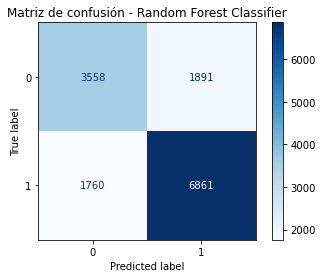

In [39]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Matriz de confusión
matrix = plot_confusion_matrix(rfc, X_test, y_test,
                               cmap=plt.cm.Blues)
plt.title('Matriz de confusión - Random Forest Classifier')
plt.show(matrix)
plt.show()

In [40]:
# True negative
TN = 3552
# False negative
FN = 1755
# False Positive
FP = 1897
# True Positive
TP = 6866

f1_score = TP/(TP + (FP + FN)/2)
print("F1 Score - Random Forest Classifier: {}".format(f1_score))

F1 Score - Random Forest Classifier: 0.7899217671421997


Regresión Logística

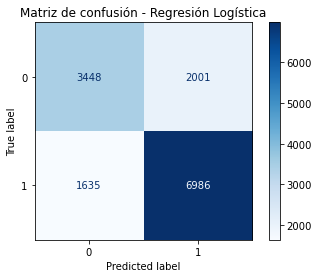

In [41]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Matriz de confusión
matrix = plot_confusion_matrix(lr, X_test, y_test,
                               cmap=plt.cm.Blues)
plt.title('Matriz de confusión - Regresión Logística')
plt.show(matrix)
plt.show()

In [42]:
# True negative
TN = 3448
# False negative
FN = 1635
# False Positive
FP = 2001
# True Positive
TP = 6986

f1_score = TP/(TP + (FP + FN)/2)
print("F1 Score - Regresión Logística: {}".format(f1_score))

F1 Score - Regresión Logística: 0.7935029532030895


Vemos que las matrices de confusión para ambos casos tienen un comportamiento casi idéntico. El F1 score de los modelos es aceptable. El resultado es bastante bueno, lo cual se comprueba realizando una curva ROC y comparando los AUC.

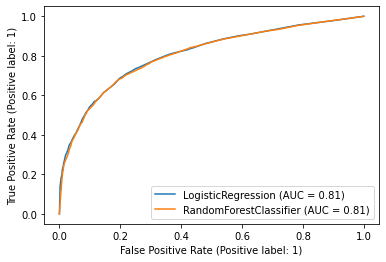

In [43]:
ax = plt.gca()
lr_disp = plot_roc_curve(lr, X_test, y_test, ax=ax)
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax)
plt.show()

La regresión logística tiene una ligera ventaja con respecto al random forest, ambos con un AUC de 0.81, pero con un F1 score ligeramente mayor. Para fines prácticos, ambos modelos tienen un desempeño idéndico y bastante aceptable para usar como predictores del riesgo de un estudiante en la prueba Saber 11.

Este resultado ratifica el análisis realizado en la preselección de variables, las cuales realmente pueden llegar a explicar el riesgo según las condiciones socio-económicas del estudiante.

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

### Solución

Dado que todas las variables presentes en el modelo son variables categóricas, podemos jugar con las diferentes combinaciones entre estas y ver cómo se afectan los puntajes, las variables dependientes.

In [44]:
variables_panel = []
variables_panel.extend(variables_categoricas)
variables_panel.extend(variables_percentiles) # Usadas únicamente para calcular el riesgo
variables_panel.extend(variables_puntaje)

datos_panel = datos_analisis[variables_panel].copy()
datos_panel["RIESGO"] = datos_panel.apply(lambda row: calcular_riesgo(row), axis = 1)
variables_puntaje.append("RIESGO")
datos_panel.head()

,ESTU_GENERO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENEAUTOMOVIL,FAMI_NUMLIBROS,FAMI_COMECARNEPESCADOHUEVO,...,PERCENTIL_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,PERCENTIL_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,RIESGO
0,M,No,Estrato 5,1 a 2,Tres,Si,No,Si,0 A 10 LIBROS,3 a 5 veces por semana,...,59,40,35.0,63,62,61,56,61.0,303,1
1,F,No,Estrato 3,3 a 4,Tres,Si,Si,Si,11 A 25 LIBROS,Todos o casi todos los días,...,64,53,45.0,65,70,63,61,69.0,325,1
2,F,No,Estrato 3,3 a 4,Tres,Si,Si,Si,0 A 10 LIBROS,Todos o casi todos los días,...,63,90,46.0,100,66,62,73,69.0,374,1
3,F,No,Estrato 4,5 a 6,Tres,Si,Si,Si,26 A 100 LIBROS,3 a 5 veces por semana,...,35,32,33.0,62,55,54,53,60.0,282,1
4,F,No,Estrato 5,5 a 6,Cuatro,Si,Si,Si,11 A 25 LIBROS,1 o 2 veces por semana,...,33,34,33.0,57,67,53,53,60.0,288,1


In [45]:
titulo = "# Tablero de control Saber 11"

In [46]:
def crear_barras(variable, objetivo):
    conteo = datos_panel.groupby(variable).mean().reset_index()
    valores = conteo['RIESGO'].tolist()
    etiquetas = conteo.index.tolist()
    return px.bar(conteo, x = variable, y = objetivo, color = variable,
                 title = "{} vs {}".format(variable, objetivo))

In [47]:
def crear_scatter(variable1, variable2, objetivo):
    return px.violin(datos_panel, x=variable1, y=objetivo, color=variable2,
                      title="{} vs {} - Color: {}".format(variable1, objetivo, variable2))

In [48]:
selector_variable1 = pn.widgets.Select(
    name = "Variable 1",
    value = variables_categoricas[0],
    options = variables_categoricas
)

selector_variable2 = pn.widgets.Select(
    name = "Variable 2",
    value = variables_categoricas[0],
    options = [var for var in variables_categoricas if var != selector_variable1.value]
)

selector_objetivo = pn.widgets.Select(
    name = 'Puntaje/Riesgo',
    value = variables_puntaje[0],
    options = variables_puntaje)

@pn.depends(selector_variable1.param.value, watch=True)
def actualizar_categoria(selector_variable1):
    _lista = [var for var in variables_categoricas if var != selector_variable1]
    selector_variable2.options = _lista
    if (selector_variable1 == selector_variable2.value):
        selector_variable2.value = _lista[0]
    
@pn.depends(selector_variable1.param.value, selector_objetivo.param.value)
def construir_barras1(selector_variable1, selector_objetivo):
    return crear_barras(selector_variable1, selector_objetivo)

@pn.depends(selector_variable2.param.value, selector_objetivo.param.value)
def construir_barras2(selector_variable2, selector_objetivo):
    return crear_barras(selector_variable2, selector_objetivo)

@pn.depends(selector_variable1.param.value, selector_variable2.param.value, selector_objetivo.param.value)
def construir_kpi(selector_variable1, selector_variable2, selector_objetivo):
    return crear_scatter(selector_variable1, selector_variable2, selector_objetivo)


tablero = pn.Column(pn.Row(titulo),
                    pn.Row(selector_variable1, selector_variable2, selector_objetivo),
                    pn.Row(pn.Card(construir_barras1)),
                    pn.Row(pn.Card(construir_barras2)),
                    pn.Row(pn.Card(construir_kpi)))

tablero.servable()

Column
    [0] Row
        [0] Markdown(str)
    [1] Row
        [0] Select(name='Variable 1', options=['ESTU_GENERO', ...], value='ESTU_GENERO')
        [1] Select(name='Variable 2', options=['ESTU_TIENEETNIA', ...], value='ESTU_TIENEETNIA')
        [2] Select(name='Puntaje/Riesgo', options=['PUNT_LECTURA_CRITICA', ...], value='PUNT_LECTURA_CRITICA')
    [2] Row
        [0] Card
            [0] ParamFunction(function)
    [3] Row
        [0] Card
            [0] ParamFunction(function)
    [4] Row
        [0] Card
            [0] ParamFunction(function)

El objetivo del anterior tablero es poder relacionar las variables socio económicas escogidas con los puntajes de la prueba Saber 11. Lo interesante del tablero anterior es que permite elegir qué puntaje observar, incluido el riesgo como se definió en el modelo.

Lo clave del tablero es mostrar el comportamiento de cada puntaje con la diferentes posibles combinaciones de variables. Por un lado, se muestran los gráficos de barras individuales para cada una de las variables permitidas. Por el otro, un violinplot que permite ver la combinación de ambas variables en un solo gráfico. Esto sobre la variable de puntaje escogida, que es la misma para los 3.

In [49]:
tablero.show()

Launching server at http://localhost:56186
